<a href="https://colab.research.google.com/github/koukyo1994/iOS-note-v2/blob/master/src/py/colab/Colab-create-dataset-and-train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [1]:
%%sh
apt -qq -y update >> /dev/null
apt -qq -y install fonts-ipafont wamerican >> /dev/null
pip install tensorflow-gpu==2.0.0 imgaug==0.2.6 coremltools==3.1 >> /dev/null





ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.


In [2]:
!git clone https://github.com/koukyo1994/iOS-note-v2.git

Cloning into 'iOS-note-v2'...
remote: Enumerating objects: 302, done.
remote: Counting objects: 100% (302/302), done.
remote: Compressing objects: 100% (235/235), done.
remote: Total 302 (delta 132), reused 216 (delta 61), pack-reused 0
Receiving objects: 100% (302/302), 11.78 MiB | 7.58 MiB/s, done.
Resolving deltas: 100% (132/132), done.


## Create Dataset

In [3]:
%cd /content/iOS-note-v2/src/py
!make create-dataset NSAMPLES=20000

/content/iOS-note-v2/src/py
chmod +x setup.sh
make font-setup
make[1]: Entering directory '/content/iOS-note-v2/src/py'
./setup.sh
alanis-hand
architext
ashcan-bb
./setup.sh: 7: [: ashcanbb_bold.ttf: unexpected operator
attack-of-the-cucumbers
./setup.sh: 7: [: attack: unexpected operator
attract-more-women
blzee
calligravity
domestic-manners
FH-GoodDogPlain-WTT
james-almacen
james-fajardo
./setup.sh: 7: [: James: unexpected operator
khand
ladylike-bb
mulders-handwriting
mumsies
Otto
pecita
quikhand
Sophia
two-turtle-doves
make[1]: Leaving directory '/content/iOS-note-v2/src/py'
python create_dataset.py --n_samples 20000
100% 20000/20000 [08:23<00:00, 39.69it/s]


## Save Dataset in Google Drive

In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp -r data/images /content/gdrive/My\ Drive/AppliedML/
!cp data/labels.csv /content/gdrive/My\ Drive/AppliedML/

## Training

In [4]:
!python train.py --config config/resnet.2blocks.json

Epoch 1
Step 10 : Loss : 59.6284866
Step 20 : Loss : 48.975502
Step 30 : Loss : 43.4608192
Step 40 : Loss : 40.2984
Step 50 : Loss : 38.1255035
Step 60 : Loss : 36.6866074
Step 70 : Loss : 35.5437469
Step 80 : Loss : 34.516098
Step 90 : Loss : 33.7528801
Step 100 : Loss : 33.1648369
Step 110 : Loss : 32.5995216
Step 120 : Loss : 32.1297455
Step 130 : Loss : 31.5976486
Step 140 : Loss : 31.2156982
Step 150 : Loss : 30.8617115
Step 160 : Loss : 30.5397224
Step 170 : Loss : 30.2848835
Step 180 : Loss : 30.0599098
Step 190 : Loss : 29.8216095
Step 200 : Loss : 29.590107
Step 210 : Loss : 29.3774014
Step 220 : Loss : 29.1248798
Step 230 : Loss : 28.9601154
Step 240 : Loss : 28.817131
Step 250 : Loss : 28.6118469
Step 260 : Loss : 28.4574852
Step 270 : Loss : 28.2847137
Step 280 : Loss : 28.1406956
Step 290 : Loss : 27.9867344
Step 300 : Loss : 27.8429565
Step 310 : Loss : 27.702404
Step 320 : Loss : 27.5794125
Step 330 : Loss : 27.445528
Step 340 : Loss : 27.3295155
Step 350 : Loss : 27.216

In [0]:
!cp bin/2blocks_model_weights.h5 /content/gdrive/My\ Drive/AppliedML/2blocks_model_weights.h5

In [13]:
!python conversion.py --config config/resnet.2blocks.json

2020-01-09 20:42:40.197307: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-01-09 20:42:40.200261: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1006] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-01-09 20:42:40.201117: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:04.0
2020-01-09 20:42:40.201448: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2020-01-09 20:42:40.203040: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2020-01-09 20:42:40.214675: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library lib

In [0]:
import coremltools
import cv2
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
mlmodel = coremltools.models.MLModel("bin/2blocks_coreml_weights.mlmodel")

In [18]:
labels = pd.read_csv("data/labels.csv")
labels.head()

,image_id,text,width,height
0,cfcd208495d565ef66e7dff9f98764da,hibernates,112,32
1,c4ca4238a0b923820dcc509a6f75849b,muscles,79,32
2,c81e728d9d4c2f636f067f89cc14862c,domination,109,32
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,sitars,59,32
4,a87ff679a2f3e71d9181a67b7542122c,fuzzes,64,32


In [20]:
labels.loc[0, "image_id"]

'cfcd208495d565ef66e7dff9f98764da'

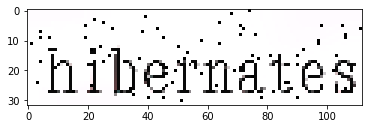

In [23]:
img = cv2.imread(f"data/images/{labels.loc[0, 'image_id']}.png")
plt.imshow(img)

In [24]:
pred = mlmodel.predict({"image": img})

Exception: ignored